### Problem Descrition

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

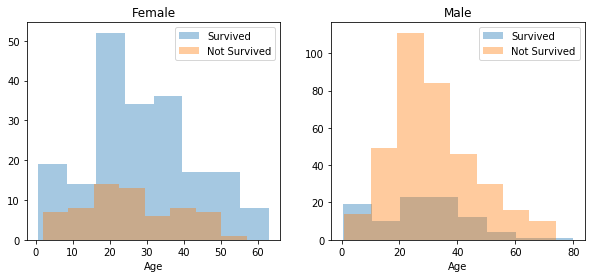

In [5]:
women_surv = survived[survived['Sex'] == 'female']
men_surv   = survived[survived['Sex'] == 'male']

women_no_surv = not_survived[not_survived['Sex'] == 'female']
men_no_surv   = not_survived[not_survived['Sex'] == 'male']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sbn.distplot(women_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Survived', 
                  ax = axes[0], kde = False)
ax = sbn.distplot(women_no_surv['Age'].dropna(), 
                  bins=8, 
                  label = 'Not Survived', 
                  ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sbn.distplot(men_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Survived', 
                  ax = axes[1], kde = False)
ax = sbn.distplot(men_no_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Not Survived', 
                  ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

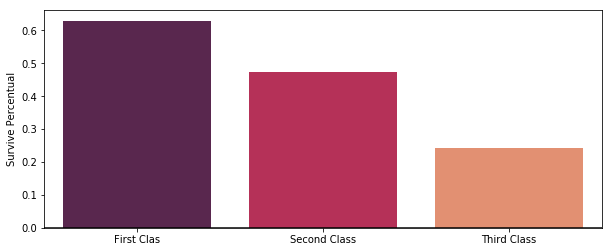

In [6]:
class_surv_perc = [0,0,0]

for i in range(3):
    total_class = sum(data['Pclass'] == i+1);
    survi_class = sum(survived['Pclass'] == i+1);
    
    class_surv_perc[i] = survi_class/total_class

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sbn.barplot(x = ['First Clas','Second Class','Third Class'], 
            y = class_surv_perc,
            palette="rocket"           
           )

ax1.axhline(0, color="k", clip_on=True)
ax1.set_ylabel("Survive Percentual");

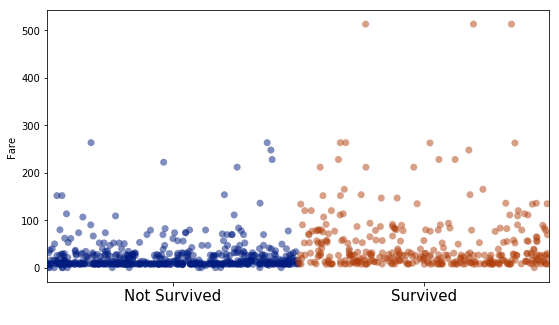

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
sbn.stripplot(x = 'Survived', 
              y = 'Fare',
              data    = data,
              palette = 'dark',
              size    = 7,
              alpha   = 0.5,
              jitter  = 0.5
             )
ax1.set_xticklabels(['Not Survived', 'Survived'], 
                    fontsize=15, 
                    rotation='horizontal')
ax1.set_xlabel(' ');

In [8]:
floors = ('A','B','C','D','E','F','G','T');

def helper_cabin(element):
    for level in floors:
        if level in element:
            return level
    return element

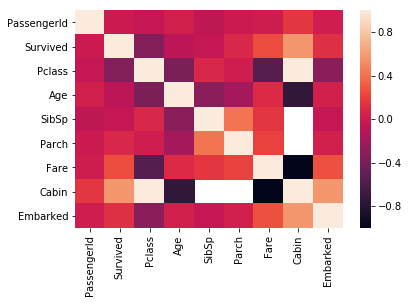

In [9]:
data_cor = data.copy();
data_cor['Cabin'] = data_cor['Cabin'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':0})
data_cor['Embarked'] = data_cor['Embarked'].map({'Q':1,'S':2,'C':3})
sbn.heatmap(data_cor.corr())

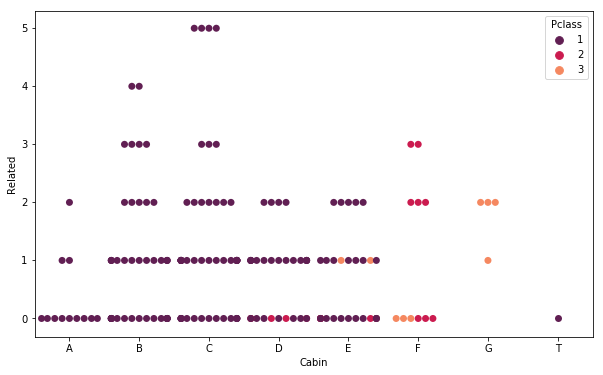

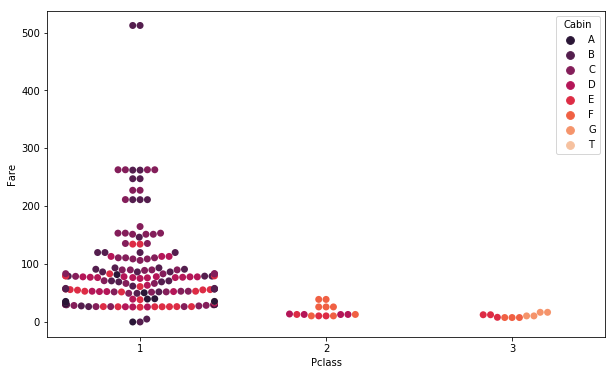

In [10]:
data['Cabin'] = data['Cabin'].dropna().apply(helper_cabin)
data = data.dropna().sort_values('Cabin')

data['Related'] = data['SibSp']+data['Parch'];

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sbn.swarmplot(x = 'Cabin',
              y = 'Related',
              data    = data,
              hue     = 'Pclass',
              palette = 'rocket',
              size    = 7,
             );

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sbn.swarmplot(x = 'Pclass',
              y = 'Fare',
              data    = data,
              hue     = 'Cabin',
              palette = 'rocket',
              size    = 7,
             );

In [11]:
for level in floors:
    print('Level '+level)
    print(data[data['Cabin']==level]['Ticket'])

Level A
599    PC 17485
647       13213
209      112277
867    PC 17590
445       33638
806      112050
23       113788
174       17764
630       27042
96     PC 17754
556       11755
583       13049
Name: Ticket, dtype: object
Level B
263        112059
632         13214
587         13567
291         11967
641      PC 17477
257        110152
540     WE/P 5735
536        113050
299      PC 17558
523        111361
520         12749
311      PC 17608
504        110152
487         11771
329        111361
484         11967
887        112053
435        113760
369      PC 17477
539         13568
671    F.C. 12750
390        113760
194      PC 17610
872           695
820         12749
802        113760
789      PC 17593
54         113509
781         17474
779         24160
763        113760
759        110152
745     WE/P 5735
195      PC 17569
737      PC 17755
118      PC 17558
730         24160
742      PC 17608
679      PC 17755
689         24160
139      PC 17593
690         17474
170     